## Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
delivery = pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## intial analysis

In [3]:
delivery.shape

(21, 2)

In [4]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## data understanding

## assumption check

# 1 : Linearity

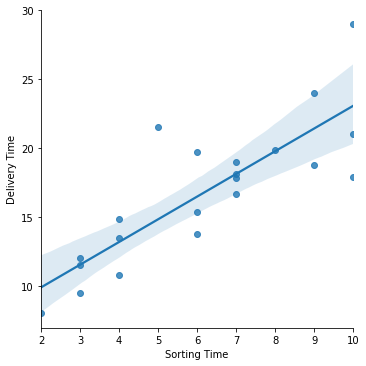

In [6]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery)
plt.show()

## Observation

### Linearity is passed

# 2: Normality Check

<function matplotlib.pyplot.show(close=None, block=None)>

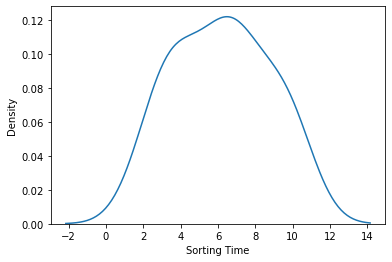

In [7]:
sns.distplot(a=delivery['Sorting Time'],hist=False)
plt.show

## Observation

### Normality is passed

# 3: No autoregression

## Observation

### Time related in this data so, no autoregression is failed

# 4 : Multicollinearity Check

## Observation

###  Multicollinearity Check is passed because only one feature in this data

#  5 :Homoscadicity | 6: Zero residual mean

## Observation

### Note: These 2 tests can be performed post model training

# Model building and Training

In [8]:
X = delivery[['Sorting Time']]
y = delivery[['Delivery Time']]

In [9]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_model = LinearRegression()
lin_model.fit(X,y)
y_predict = lin_model.predict(X)
y_predict

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [21]:
error = y- y_predict
error

,Delivery Time
0,-2.072933
1,0.321186
2,3.273147
3,2.576087
4,5.927067
5,-1.126853
6,0.874127
7,-2.029794
8,-5.172933
9,-2.673913


# Homoscadicity Check

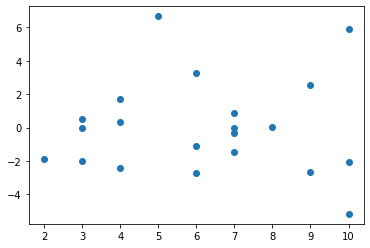

In [14]:
plt.scatter(x=delivery['Sorting Time'],y=error)
plt.show()

## Observation

### Homoscadicity  is failed

# ZERO RESIDUAL MEAN

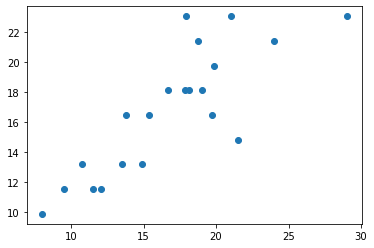

In [15]:
plt.scatter(x=y,y=y_predict)
plt.show()

## Observation

### Linearity is failed

# Log Transformation

In [16]:
delivery2 = delivery.copy()

In [17]:
delivery2['log_Sorting'] = np.log(delivery2['Sorting Time'])
delivery2

,Delivery Time,Sorting Time,log_Sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


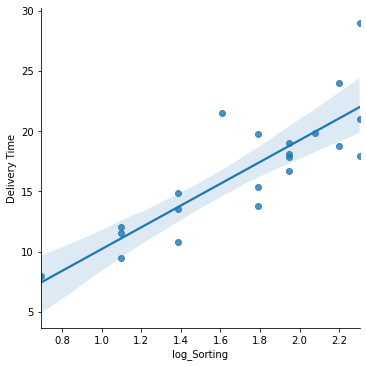

In [18]:
sns.lmplot(x='log_Sorting',y='Delivery Time',data=delivery2)
plt.show()

## Observation

## Linearity and Transformation is failed

## ============================= End ====================================